# BenSira Collatex

##### Python Packages

In [2]:
!pip install collatex
!pip install graphviz
!pip install levenshtein
!pip install xmltodict
!pip install beautifulsoup4
!pip install lxml
!pip install textdistance
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install spacy==3.2.2
!pip install hebspacy
!pip install openpyxl


^C


### File Parsing

In [3]:
# See if beautiful soup can be of any use
# This part of the code is clunky but it is what it is

# Implementation of the first part
from itertools import combinations
from bs4 import BeautifulSoup
import re

fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_c_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]
soup = dict()
chapter = dict()
verse_list = dict()
verses = dict()

for currFile in fileNames:
    with open(currFile,encoding="utf8") as fp:
        soup[currFile] = BeautifulSoup(fp,features='xml')
        chs = list()
        verse_list[currFile] = dict()
        verses[currFile] =dict()
        for i in soup[currFile].findAll("chap"):
            ch_string=i.contents[0].strip()
            chs.append(ch_string) # strip to remove trailing spaces or new line characters
            verses_list = list()
            verse = i.findAll("text")
            verses[currFile][ch_string] = dict()
            for verse_iter in verse:
                if verse_iter.verse_nb:
                    verse_num=verse_iter.verse_nb.text.strip()
                verses_list.append(verse_num)
                """
                <!ELEMENT folio (#PCDATA)> <!-- shelfmark of the manuscript and folio number -->
                <!ELEMENT verse_nb (#PCDATA)> <!-- verse (children of chapter) -->
                <!ELEMENT line (#PCDATA)> <!-- line on the manuscript -->
                <!ELEMENT vacat_car (#PCDATA)> <!-- a space into the manuscript -->
                <!ELEMENT greek (#PCDATA)> <!-- greek word or letter -->
                <!ELEMENT reconstructed (#PCDATA)> <!-- Hebrew reconstructed -->
                <!ELEMENT superscript (#PCDATA)> <!-- Hebrew superscript letters or words -->
                <!ELEMENT supralinear (#PCDATA)> <!-- Hebrew supralinear letters or words (I think = superscript) -->
                <!ELEMENT margin_reconstructed (#PCDATA)> <!-- marginal notation reconstructed -->
                <!ELEMENT margin_car (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_infralinear (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_supralinear (#PCDATA)> <!-- marginal notation -->
                """
                # For now clean the text which might be enclosed in the tags
                unwanted_tags= ["folio","verse_nb","line","vacat_car","greek","superscript",\
                "supralinear","margin_reconstructed","margin_car","margin_infralinear",\
                "margin_supralinear","Article"]
                
                # Clean tags
                [s.extract() for s in verse_iter(unwanted_tags)]
                
                # FileName will never be empty
                if (ch_string and verse_num):
                    verses[currFile][ch_string][verse_num] = verse_iter.text.replace("[","").replace("]","")
            verse_list[currFile][ch_string]=verses_list
        
        chapter[currFile] = chs
        #verse = chapter[currFile].findAll("text")
        #for i in verse:
            #print(i.verse_nb.text)
            #print(i.contents)
            #ls = [type(item) for item in i.contents]
            #print(ls)
            #print("\n")


#print(soup['ms_d_new.xml'].findAll("chap")[0].contents[0])



# Implementation of the second part
# Building the combinations
chap_matching = dict()
witnesses = dict()
chap_info = dict()
count = 0
for combo in combinations(fileNames, 2):  # 2 for pairs, 3 for triplets, etc
    matching_chs_list = []
    if combo[0] in chap_matching.keys():
        pass
    else:
        chap_matching[combo[0]] = dict()
    for chap_in_file1 in chapter[combo[0]]:
        for chap_in_file2 in chapter[combo[1]]:
            ch1_num=re.findall(r'\b\d+\b', chap_in_file1)
            ch2_num=re.findall(r'\b\d+\b', chap_in_file2)
            if ch1_num == ch2_num:
                matching_chs_list.append([chap_in_file1,chap_in_file2]) 
                # Lets see if we can find common verses
                common_verses= set(verse_list[combo[0]][chap_in_file1]).intersection(verse_list[combo[1]][chap_in_file2])
                for com_verse in common_verses:
                    if com_verse:
                        witnesses[count] = dict()
                        witnesses[count]['A'] = verses[combo[0]][chap_in_file1][com_verse]
                        witnesses[count]['B'] = verses[combo[1]][chap_in_file2][com_verse]
                        chap_info[count] = (combo[0],chap_in_file1,combo[1],chap_in_file2,com_verse)
                        count = count+1;
    chap_matching[combo[0]][combo[1]]=matching_chs_list
    

# Changing the witness variable here will change the verse which will be loaded for comaparison
witness_index=12
from collatex import *
collation = Collation()
collation.add_plain_witness("A", witnesses[witness_index]['A'])
collation.add_plain_witness("B", witnesses[witness_index]['B'])
print("\nManuscript A: "+witnesses[witness_index]['A'])
print("Manuscript B: "+witnesses[witness_index]['B']+"\n")
#alignment_table = collate(collation, segmentation=False)
#print(chap_matching)
#print(verses)
print(chap_info[witness_index])
alignment_table = collate(collation,output="svg")


            

Error: syntax error in line 1 
... <B></B> ...
in label of node 3

(dot.exe:11836): Pango-WARNING **: couldn't load font "Bukyvede Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



Manuscript A:  בְטֶ֥רֶם תַ֭חְקר̊ א‍ַל־תְסַלֵף	בַּקֵּרֽ לְ֜פָנִֹים וְאַחַ֥ר תַזִֿיֹֽׁף׃ 
Manuscript B:  בטרם תחק̊̊ו̊̊ר אל תסלף	בקר לפנים וא֟חר̇ תזיף׃

('ms_a_new.xml', 'Chapter 11', 'ms_b_new.xml', 'Siracide 11', '7')


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tsvg', '-O', 'Digraph.gv']' returned non-zero exit status 1. [stderr: b'Error: syntax error in line 1 \r\n... <B></B> ...\r\nin label of node 3\r\n\r\n(dot.exe:11836): Pango-WARNING **: couldn\'t load font "Bukyvede Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.\r\n']

### Import Data into Pandas Dataframe

In [4]:
# We import the chap_info variable into pandas
import pandas as pd
chap_info_df = pd.DataFrame.from_dict(chap_info,orient='index',columns=['Manuscript1','Chapter1','Manuscript2','Chapter2','Verse'])
# Strip ms_a and _new.xml from the manuscript
chap_info_df['Manuscript1'] = chap_info_df['Manuscript1'].str.replace('ms_','')
chap_info_df['Manuscript2'] = chap_info_df['Manuscript2'].str.replace('ms_','')
# Strip _new.xml from the manuscript filenames
chap_info_df['Manuscript1'] = chap_info_df['Manuscript1'].str.replace('_new.xml','')
chap_info_df['Manuscript2'] = chap_info_df['Manuscript2'].str.replace('_new.xml','')
# Add the witnesses to the dataframe
chap_info_df['Witness1'] = chap_info_df.index.map(lambda x: witnesses[x]['A'])
chap_info_df['Witness2'] = chap_info_df.index.map(lambda x: witnesses[x]['B'])


chap_info_df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21484\3562724505.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  chap_info_df['Manuscript1'] = chap_info_df['Manuscript1'].str.replace('_new.xml','')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21484\3562724505.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  chap_info_df['Manuscript2'] = chap_info_df['Manuscript2'].str.replace('_new.xml','')


,Manuscript1,Chapter1,Manuscript2,Chapter2,Verse,Witness1,Witness2
0,a,Chapter 10,b,Siracide 10,25,עבד משכיל הורם\tועבד̊ מש̊כיל ל̊ﬡ יתאונן׃,עבד משכיל חביב כנפש\t\t
1,a,Chapter 10,b,Siracide 10,20,בין אחים ראשם נכבד\tוירא א‍להים בע̇ינ̊יו׃,בין אחים ראשם נכבד\tוירא אלהים נכבד ממנו׃
2,a,Chapter 10,b,Siracide 10,31,נכבד בעשרו איככה\tונקלה בעיניו איככה׃,הנכבד בעיניו ב̊̊ע̇שרו איככה\tונקלה בעשרו בעיני...
3,a,Chapter 10,b,Siracide 10,27,טוב עובד ויותר הון\tממ̊ת̊כבד וח̊סר מתן׃,טוב עובד ויותר הון\tממתכבד̊̊\t
4,a,Chapter 10,b,Siracide 10,24,ש̇ר מושל ושופט נכב̇דו\tו̇א̊ין גד̇ול מ̊ירא א‍ל...,שר שופט ומושל נכבדו\tוא̇ין ג̊̊ד̇ול מירא אלהים\t
...,...,...,...,...,...,...,...
148,e,Chapter 33,f,Chapter 33,7,מה על יום יום כי כלו׃\tאור שנה על שמש̊׃,מה על יום יום כי כלו∙\tאור שונה על שמש׃
149,e,Chapter 33,f,Chapter 33,8,אבל ב̶ח̶כ̶מ̶ת̶ בחכמת ייי נשפטו\tויש מהם מועד׃,אבל בחכמת ייי נשפטו∙\tויש מהם מועד
150,e,Chapter 33,f,Chapter 33,6,כסוס מוכן אוהב שונא׃\tתחת כל אוהב יצהל׃,כסוס מוכן אוהב שונא∙\tתחת כל אוהב יצהל׃
151,e,Chapter 33,f,Chapter 33,5,גלגל קל̊ לב נבל׃\tואופן̊ חוזר מחשבותיו׃,גלגל קל לב נבל∙\tואופן חוזר מחש̇בותי̇ו׃


### Clean the witnesses

In [5]:

def clean_hebrew_punctuations(text):
    # Replace tab characters with spaces
    text = text.replace('\t', ' ')
    # Regex pattern for hebrew text excluding punctuation
    pattern = r'[^\u0591-\u05F4\uFB1D-\uFB4F  ]|[\u05F3\u05F4\u05BE\u05C0\u05C3\u05C2\u05BD\u059F]'
    # Use re.sub() to replace matched characters with ''
    output_str = re.sub(pattern, '', text)
    return output_str


In [6]:
num_witnesses = len(witnesses)
 # lets clean the witnesses using the clean_hebrew_punctuations function into a new dictionary for collatex
witnesses_clean = dict()
for i in range(num_witnesses):
    witnesses_clean[i] = dict()
    witnesses_clean[i]['A'] = clean_hebrew_punctuations(witnesses[i]['A'])
    witnesses_clean[i]['B'] = clean_hebrew_punctuations(witnesses[i]['B'])

# Apply cleaning function to the dataframe
chap_info_df['Witness1_cleaned'] = chap_info_df['Witness1'].apply(lambda x: clean_hebrew_punctuations(x))
chap_info_df['Witness2_cleaned'] = chap_info_df['Witness2'].apply(lambda x: clean_hebrew_punctuations(x))
chap_info_df.head(10)

,Manuscript1,Chapter1,Manuscript2,Chapter2,Verse,Witness1,Witness2,Witness1_cleaned,Witness2_cleaned
0,a,Chapter 10,b,Siracide 10,25,עבד משכיל הורם\tועבד̊ מש̊כיל ל̊ﬡ יתאונן׃,עבד משכיל חביב כנפש\t\t,עבד משכיל הורם ועבד משכיל לﬡ יתאונן,עבד משכיל חביב כנפש
1,a,Chapter 10,b,Siracide 10,20,בין אחים ראשם נכבד\tוירא א‍להים בע̇ינ̊יו׃,בין אחים ראשם נכבד\tוירא אלהים נכבד ממנו׃,בין אחים ראשם נכבד וירא אלהים בעיניו,בין אחים ראשם נכבד וירא אלהים נכבד ממנו
2,a,Chapter 10,b,Siracide 10,31,נכבד בעשרו איככה\tונקלה בעיניו איככה׃,הנכבד בעיניו ב̊̊ע̇שרו איככה\tונקלה בעשרו בעיני...,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה
3,a,Chapter 10,b,Siracide 10,27,טוב עובד ויותר הון\tממ̊ת̊כבד וח̊סר מתן׃,טוב עובד ויותר הון\tממתכבד̊̊\t,טוב עובד ויותר הון ממתכבד וחסר מתן,טוב עובד ויותר הון ממתכבד
4,a,Chapter 10,b,Siracide 10,24,ש̇ר מושל ושופט נכב̇דו\tו̇א̊ין גד̇ול מ̊ירא א‍ל...,שר שופט ומושל נכבדו\tוא̇ין ג̊̊ד̇ול מירא אלהים\t,שר מושל ושופט נכבדו ואין גדול מירא אלהים,שר שופט ומושל נכבדו ואין גדול מירא אלהים
5,a,Chapter 10,b,Siracide 10,30,יש דל נכבד בגלל שכלו\tויש נכבד בגלל עש̇ר̊ו׃,֟דל נכבד בגלל שכלו\tויש איש עשיר נכבד ב̇ג̇ל̇ל̊...,יש דל נכבד בגלל שכלו ויש נכבד בגלל עשרו,דל נכבד בגלל שכלו ויש איש עשיר נכבד בגלל עשרו
6,a,Chapter 10,b,Siracide 10,23,אין לבזות ד̇ל̇ מ̊ש̇כיל\tואין לכבד כ̊ל איש חכ̊ם׃,אין לבזות דל משכיל\tואין לכבד כל איש חמס׃,אין לבזות דל משכיל ואין לכבד כל איש חכם,אין לבזות דל משכיל ואין לכבד כל איש חמס
7,a,Chapter 10,b,Siracide 10,26,א‍ַל תתחכם לע̇ב̇ד חפ̇צך\tוא‍ל ת̊ת̇כבד בע̊ת̊ צ...,אל תתחכם לעשות חפ֟צך\tואל תתכב̊̊ד\t,אַל תתחכם לעבד חפצך ואל תתכבד בעת צרכך,אל תתחכם לעשות חפצך ואל תתכבד
8,a,Chapter 10,b,Siracide 10,22,גר וזר נכרי ורש\tתפארתם י̊רא̊ת א‍להים•,גר זר נכרי ורש\tתפארתם ירא֟ת ייי׃\t,גר וזר נכרי ורש תפארתם יראת אלהים,גר זר נכרי ורש תפארתם יראת ייי
9,a,Chapter 10,b,Siracide 10,29,מרשיע נפשו מי יצדיקנו\tומי יכבד מקלה נפשו׃,בני מרשיע נפשו מי יצדיקנו\tומי יכבד מ̊̊קלה נפשו׃,מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,בני מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו


### Run the actual collation

In [7]:
# Use the collatex library to perform the collation and build the variants

num_witnesses = len(witnesses)
# Lets create an empty dictionary to store the variants
variants = dict()
# For chapter information we can refer to the dictionary chap_info
# The dictionary indexes are same across all the data

# Lets loop of each witness
for witness_ind in range(num_witnesses):
    # Lets run the collation for each set of witnesses
    # Create empty dictionary for each element
    variants[witness_ind] = dict()
    variants[witness_ind]['A'] = '' # Empty initialisatiom
    variants[witness_ind]['B'] = ''
    collation = Collation()
    collation.add_plain_witness("A", witnesses_clean[witness_ind]['A'])
    collation.add_plain_witness("B", witnesses_clean[witness_ind]['B'])
    # Perform the collation
    alignment_table = collate(collation)
    # Lets start trying to find the variants
    for column in alignment_table.columns:
        if column.variant:
        # Add to variants the tokens as strings       
            for manuscript, tokens in column.tokens_per_witness.items():
                token_strings = [token.token_string for token in tokens]
                variants[witness_ind][manuscript] += ' '.join(token_strings)
                variants[witness_ind][manuscript] += ' '


In [8]:
# Variants are now stored in the dataframe
# Insert the variants from the variants variable into the same dataframe
chap_info_df['Variant1'] = chap_info_df.index.map(lambda x: variants[x]['A'])
chap_info_df['Variant2'] = chap_info_df.index.map(lambda x: variants[x]['B'])

chap_info_df.head(10)

,Manuscript1,Chapter1,Manuscript2,Chapter2,Verse,Witness1,Witness2,Witness1_cleaned,Witness2_cleaned,Variant1,Variant2
0,a,Chapter 10,b,Siracide 10,25,עבד משכיל הורם\tועבד̊ מש̊כיל ל̊ﬡ יתאונן׃,עבד משכיל חביב כנפש\t\t,עבד משכיל הורם ועבד משכיל לﬡ יתאונן,עבד משכיל חביב כנפש,משכיל הורם ועבד לﬡ יתאונן,חביב כנפש
1,a,Chapter 10,b,Siracide 10,20,בין אחים ראשם נכבד\tוירא א‍להים בע̇ינ̊יו׃,בין אחים ראשם נכבד\tוירא אלהים נכבד ממנו׃,בין אחים ראשם נכבד וירא אלהים בעיניו,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,בעיניו,נכבד ממנו
2,a,Chapter 10,b,Siracide 10,31,נכבד בעשרו איככה\tונקלה בעיניו איככה׃,הנכבד בעיניו ב̊̊ע̇שרו איככה\tונקלה בעשרו בעיני...,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,נכבד,הנכבד בעיניו בעשרו
3,a,Chapter 10,b,Siracide 10,27,טוב עובד ויותר הון\tממ̊ת̊כבד וח̊סר מתן׃,טוב עובד ויותר הון\tממתכבד̊̊\t,טוב עובד ויותר הון ממתכבד וחסר מתן,טוב עובד ויותר הון ממתכבד,וחסר מתן,
4,a,Chapter 10,b,Siracide 10,24,ש̇ר מושל ושופט נכב̇דו\tו̇א̊ין גד̇ול מ̊ירא א‍ל...,שר שופט ומושל נכבדו\tוא̇ין ג̊̊ד̇ול מירא אלהים\t,שר מושל ושופט נכבדו ואין גדול מירא אלהים,שר שופט ומושל נכבדו ואין גדול מירא אלהים,מושל ושופט,שופט ומושל
5,a,Chapter 10,b,Siracide 10,30,יש דל נכבד בגלל שכלו\tויש נכבד בגלל עש̇ר̊ו׃,֟דל נכבד בגלל שכלו\tויש איש עשיר נכבד ב̇ג̇ל̇ל̊...,יש דל נכבד בגלל שכלו ויש נכבד בגלל עשרו,דל נכבד בגלל שכלו ויש איש עשיר נכבד בגלל עשרו,יש,איש עשיר
6,a,Chapter 10,b,Siracide 10,23,אין לבזות ד̇ל̇ מ̊ש̇כיל\tואין לכבד כ̊ל איש חכ̊ם׃,אין לבזות דל משכיל\tואין לכבד כל איש חמס׃,אין לבזות דל משכיל ואין לכבד כל איש חכם,אין לבזות דל משכיל ואין לכבד כל איש חמס,חכם,חמס
7,a,Chapter 10,b,Siracide 10,26,א‍ַל תתחכם לע̇ב̇ד חפ̇צך\tוא‍ל ת̊ת̇כבד בע̊ת̊ צ...,אל תתחכם לעשות חפ֟צך\tואל תתכב̊̊ד\t,אַל תתחכם לעבד חפצך ואל תתכבד בעת צרכך,אל תתחכם לעשות חפצך ואל תתכבד,א ַ ל לעבד בעת צרכך,אל לעשות
8,a,Chapter 10,b,Siracide 10,22,גר וזר נכרי ורש\tתפארתם י̊רא̊ת א‍להים•,גר זר נכרי ורש\tתפארתם ירא֟ת ייי׃\t,גר וזר נכרי ורש תפארתם יראת אלהים,גר זר נכרי ורש תפארתם יראת ייי,וזר אלהים,זר ייי
9,a,Chapter 10,b,Siracide 10,29,מרשיע נפשו מי יצדיקנו\tומי יכבד מקלה נפשו׃,בני מרשיע נפשו מי יצדיקנו\tומי יכבד מ̊̊קלה נפשו׃,מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,בני מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,,בני


### Implement text distances 

In [9]:
# Apply text distance function to the dataframe between the variants
from textdistance import levenshtein
chap_info_df['Levenshtein'] = chap_info_df.apply(lambda x: levenshtein(x['Variant1'], x['Variant2']), axis=1)
chap_info_df.head(10)

,Manuscript1,Chapter1,Manuscript2,Chapter2,Verse,Witness1,Witness2,Witness1_cleaned,Witness2_cleaned,Variant1,Variant2,Levenshtein
0,a,Chapter 10,b,Siracide 10,25,עבד משכיל הורם\tועבד̊ מש̊כיל ל̊ﬡ יתאונן׃,עבד משכיל חביב כנפש\t\t,עבד משכיל הורם ועבד משכיל לﬡ יתאונן,עבד משכיל חביב כנפש,משכיל הורם ועבד לﬡ יתאונן,חביב כנפש,23
1,a,Chapter 10,b,Siracide 10,20,בין אחים ראשם נכבד\tוירא א‍להים בע̇ינ̊יו׃,בין אחים ראשם נכבד\tוירא אלהים נכבד ממנו׃,בין אחים ראשם נכבד וירא אלהים בעיניו,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,בעיניו,נכבד ממנו,7
2,a,Chapter 10,b,Siracide 10,31,נכבד בעשרו איככה\tונקלה בעיניו איככה׃,הנכבד בעיניו ב̊̊ע̇שרו איככה\tונקלה בעשרו בעיני...,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,נכבד,הנכבד בעיניו בעשרו,14
3,a,Chapter 10,b,Siracide 10,27,טוב עובד ויותר הון\tממ̊ת̊כבד וח̊סר מתן׃,טוב עובד ויותר הון\tממתכבד̊̊\t,טוב עובד ויותר הון ממתכבד וחסר מתן,טוב עובד ויותר הון ממתכבד,וחסר מתן,,10
4,a,Chapter 10,b,Siracide 10,24,ש̇ר מושל ושופט נכב̇דו\tו̇א̊ין גד̇ול מ̊ירא א‍ל...,שר שופט ומושל נכבדו\tוא̇ין ג̊̊ד̇ול מירא אלהים\t,שר מושל ושופט נכבדו ואין גדול מירא אלהים,שר שופט ומושל נכבדו ואין גדול מירא אלהים,מושל ושופט,שופט ומושל,7
5,a,Chapter 10,b,Siracide 10,30,יש דל נכבד בגלל שכלו\tויש נכבד בגלל עש̇ר̊ו׃,֟דל נכבד בגלל שכלו\tויש איש עשיר נכבד ב̇ג̇ל̇ל̊...,יש דל נכבד בגלל שכלו ויש נכבד בגלל עשרו,דל נכבד בגלל שכלו ויש איש עשיר נכבד בגלל עשרו,יש,איש עשיר,6
6,a,Chapter 10,b,Siracide 10,23,אין לבזות ד̇ל̇ מ̊ש̇כיל\tואין לכבד כ̊ל איש חכ̊ם׃,אין לבזות דל משכיל\tואין לכבד כל איש חמס׃,אין לבזות דל משכיל ואין לכבד כל איש חכם,אין לבזות דל משכיל ואין לכבד כל איש חמס,חכם,חמס,3
7,a,Chapter 10,b,Siracide 10,26,א‍ַל תתחכם לע̇ב̇ד חפ̇צך\tוא‍ל ת̊ת̇כבד בע̊ת̊ צ...,אל תתחכם לעשות חפ֟צך\tואל תתכב̊̊ד\t,אַל תתחכם לעבד חפצך ואל תתכבד בעת צרכך,אל תתחכם לעשות חפצך ואל תתכבד,א ַ ל לעבד בעת צרכך,אל לעשות,14
8,a,Chapter 10,b,Siracide 10,22,גר וזר נכרי ורש\tתפארתם י̊רא̊ת א‍להים•,גר זר נכרי ורש\tתפארתם ירא֟ת ייי׃\t,גר וזר נכרי ורש תפארתם יראת אלהים,גר זר נכרי ורש תפארתם יראת ייי,וזר אלהים,זר ייי,6
9,a,Chapter 10,b,Siracide 10,29,מרשיע נפשו מי יצדיקנו\tומי יכבד מקלה נפשו׃,בני מרשיע נפשו מי יצדיקנו\tומי יכבד מ̊̊קלה נפשו׃,מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,בני מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,,בני,3


In [10]:
# Calculate the hamming distance between the variants
from textdistance import hamming
chap_info_df['Hamming'] = chap_info_df.apply(lambda x: hamming(x['Variant1'], x['Variant2']), axis=1)  
chap_info_df.head(10)

,Manuscript1,Chapter1,Manuscript2,Chapter2,Verse,Witness1,Witness2,Witness1_cleaned,Witness2_cleaned,Variant1,Variant2,Levenshtein,Hamming
0,a,Chapter 10,b,Siracide 10,25,עבד משכיל הורם\tועבד̊ מש̊כיל ל̊ﬡ יתאונן׃,עבד משכיל חביב כנפש\t\t,עבד משכיל הורם ועבד משכיל לﬡ יתאונן,עבד משכיל חביב כנפש,משכיל הורם ועבד לﬡ יתאונן,חביב כנפש,23,27
1,a,Chapter 10,b,Siracide 10,20,בין אחים ראשם נכבד\tוירא א‍להים בע̇ינ̊יו׃,בין אחים ראשם נכבד\tוירא אלהים נכבד ממנו׃,בין אחים ראשם נכבד וירא אלהים בעיניו,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,בעיניו,נכבד ממנו,7,10
2,a,Chapter 10,b,Siracide 10,31,נכבד בעשרו איככה\tונקלה בעיניו איככה׃,הנכבד בעיניו ב̊̊ע̇שרו איככה\tונקלה בעשרו בעיני...,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,נכבד,הנכבד בעיניו בעשרו,14,14
3,a,Chapter 10,b,Siracide 10,27,טוב עובד ויותר הון\tממ̊ת̊כבד וח̊סר מתן׃,טוב עובד ויותר הון\tממתכבד̊̊\t,טוב עובד ויותר הון ממתכבד וחסר מתן,טוב עובד ויותר הון ממתכבד,וחסר מתן,,10,10
4,a,Chapter 10,b,Siracide 10,24,ש̇ר מושל ושופט נכב̇דו\tו̇א̊ין גד̇ול מ̊ירא א‍ל...,שר שופט ומושל נכבדו\tוא̇ין ג̊̊ד̇ול מירא אלהים\t,שר מושל ושופט נכבדו ואין גדול מירא אלהים,שר שופט ומושל נכבדו ואין גדול מירא אלהים,מושל ושופט,שופט ומושל,7,12
5,a,Chapter 10,b,Siracide 10,30,יש דל נכבד בגלל שכלו\tויש נכבד בגלל עש̇ר̊ו׃,֟דל נכבד בגלל שכלו\tויש איש עשיר נכבד ב̇ג̇ל̇ל̊...,יש דל נכבד בגלל שכלו ויש נכבד בגלל עשרו,דל נכבד בגלל שכלו ויש איש עשיר נכבד בגלל עשרו,יש,איש עשיר,6,6
6,a,Chapter 10,b,Siracide 10,23,אין לבזות ד̇ל̇ מ̊ש̇כיל\tואין לכבד כ̊ל איש חכ̊ם׃,אין לבזות דל משכיל\tואין לכבד כל איש חמס׃,אין לבזות דל משכיל ואין לכבד כל איש חכם,אין לבזות דל משכיל ואין לכבד כל איש חמס,חכם,חמס,3,5
7,a,Chapter 10,b,Siracide 10,26,א‍ַל תתחכם לע̇ב̇ד חפ̇צך\tוא‍ל ת̊ת̇כבד בע̊ת̊ צ...,אל תתחכם לעשות חפ֟צך\tואל תתכב̊̊ד\t,אַל תתחכם לעבד חפצך ואל תתכבד בעת צרכך,אל תתחכם לעשות חפצך ואל תתכבד,א ַ ל לעבד בעת צרכך,אל לעשות,14,20
8,a,Chapter 10,b,Siracide 10,22,גר וזר נכרי ורש\tתפארתם י̊רא̊ת א‍להים•,גר זר נכרי ורש\tתפארתם ירא֟ת ייי׃\t,גר וזר נכרי ורש תפארתם יראת אלהים,גר זר נכרי ורש תפארתם יראת ייי,וזר אלהים,זר ייי,6,11
9,a,Chapter 10,b,Siracide 10,29,מרשיע נפשו מי יצדיקנו\tומי יכבד מקלה נפשו׃,בני מרשיע נפשו מי יצדיקנו\tומי יכבד מ̊̊קלה נפשו׃,מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,בני מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,,בני,3,4


In [11]:
chap_info_df

,Manuscript1,Chapter1,Manuscript2,Chapter2,Verse,Witness1,Witness2,Witness1_cleaned,Witness2_cleaned,Variant1,Variant2,Levenshtein,Hamming
0,a,Chapter 10,b,Siracide 10,25,עבד משכיל הורם\tועבד̊ מש̊כיל ל̊ﬡ יתאונן׃,עבד משכיל חביב כנפש\t\t,עבד משכיל הורם ועבד משכיל לﬡ יתאונן,עבד משכיל חביב כנפש,משכיל הורם ועבד לﬡ יתאונן,חביב כנפש,23,27
1,a,Chapter 10,b,Siracide 10,20,בין אחים ראשם נכבד\tוירא א‍להים בע̇ינ̊יו׃,בין אחים ראשם נכבד\tוירא אלהים נכבד ממנו׃,בין אחים ראשם נכבד וירא אלהים בעיניו,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,בעיניו,נכבד ממנו,7,10
2,a,Chapter 10,b,Siracide 10,31,נכבד בעשרו איככה\tונקלה בעיניו איככה׃,הנכבד בעיניו ב̊̊ע̇שרו איככה\tונקלה בעשרו בעיני...,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,נכבד,הנכבד בעיניו בעשרו,14,14
3,a,Chapter 10,b,Siracide 10,27,טוב עובד ויותר הון\tממ̊ת̊כבד וח̊סר מתן׃,טוב עובד ויותר הון\tממתכבד̊̊\t,טוב עובד ויותר הון ממתכבד וחסר מתן,טוב עובד ויותר הון ממתכבד,וחסר מתן,,10,10
4,a,Chapter 10,b,Siracide 10,24,ש̇ר מושל ושופט נכב̇דו\tו̇א̊ין גד̇ול מ̊ירא א‍ל...,שר שופט ומושל נכבדו\tוא̇ין ג̊̊ד̇ול מירא אלהים\t,שר מושל ושופט נכבדו ואין גדול מירא אלהים,שר שופט ומושל נכבדו ואין גדול מירא אלהים,מושל ושופט,שופט ומושל,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,e,Chapter 33,f,Chapter 33,7,מה על יום יום כי כלו׃\tאור שנה על שמש̊׃,מה על יום יום כי כלו∙\tאור שונה על שמש׃,מה על יום יום כי כלו אור שנה על שמש,מה על יום יום כי כלו אור שונה על שמש,שנה,שונה,1,4
149,e,Chapter 33,f,Chapter 33,8,אבל ב̶ח̶כ̶מ̶ת̶ בחכמת ייי נשפטו\tויש מהם מועד׃,אבל בחכמת ייי נשפטו∙\tויש מהם מועד,אבל בחכמת בחכמת ייי נשפטו ויש מהם מועד,אבל בחכמת ייי נשפטו ויש מהם מועד,בחכמת,,6,6
150,e,Chapter 33,f,Chapter 33,6,כסוס מוכן אוהב שונא׃\tתחת כל אוהב יצהל׃,כסוס מוכן אוהב שונא∙\tתחת כל אוהב יצהל׃,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,,,0,0
151,e,Chapter 33,f,Chapter 33,5,גלגל קל̊ לב נבל׃\tואופן̊ חוזר מחשבותיו׃,גלגל קל לב נבל∙\tואופן חוזר מחש̇בותי̇ו׃,גלגל קל לב נבל ואופן חוזר מחשבותיו,גלגל קל לב נבל ואופן חוזר מחשבותיו,,,0,0


#### This part of the code tries to assess text inversions

""" In its current form it only labels empty variants as true inversions """
""" This function needs to be looked up """

In [12]:
# Lets detect word inversions
def detect_inversion(text1, text2):
    set1 = set(text1.split())
    set2 = set(text2.split())
    count = 0
    if set1 == set2 and len(text1.split()) == len(text2.split()): # check if the sentences have same words and no repeating words
        if text1.split() != text2.split(): # check or inversion if not exact matches
            for i in range(len(text1.split())-2): 
                if text1.split()[i] == text2.split()[i+1] and text1.split()[i+1] == text2.split()[i]: #check for near inversion when consecutive words are inverted
                    count = count+1

            if count > 0:
                return "near inversion"   
            else:
                return "far inversion"    

        else:
            return "exact match"
# Apply detect inversion function to the dataframe
chap_info_df['Inversion'] = chap_info_df.apply(lambda x: detect_inversion(x['Witness1_cleaned'],x['Witness2_cleaned']),axis=1)
# Count the true and false values in the inversion column
chap_info_df[["Manuscript1", "Chapter1","Manuscript2", "Chapter1","Witness1_cleaned", "Witness2_cleaned", "Variant1", "Variant2",'Inversion']]
chap_info_df['Inversion'].value_counts()

exact match    33
Name: Inversion, dtype: int64

ADDITION/DELETION

In [13]:
import difflib

def diff_texts(text1, text2):
    text1_words = text1.split()
    text2_words = text2.split()
    
    d = difflib.Differ()
    diff = d.compare(text1_words, text2_words)
    
    return '\n'.join(diff)

# Apply the diff_texts function to the cleaned witnesses
chap_info_df['Witness_diff'] = chap_info_df.apply(lambda x: diff_texts(x['Witness1_cleaned'],x['Witness2_cleaned']),axis=1)
chap_info_df


,Manuscript1,Chapter1,Manuscript2,Chapter2,Verse,Witness1,Witness2,Witness1_cleaned,Witness2_cleaned,Variant1,Variant2,Levenshtein,Hamming,Inversion,Witness_diff
0,a,Chapter 10,b,Siracide 10,25,עבד משכיל הורם\tועבד̊ מש̊כיל ל̊ﬡ יתאונן׃,עבד משכיל חביב כנפש\t\t,עבד משכיל הורם ועבד משכיל לﬡ יתאונן,עבד משכיל חביב כנפש,משכיל הורם ועבד לﬡ יתאונן,חביב כנפש,23,27,None,עבד\n משכיל\n+ חביב\n+ כנפש\n- הורם\n- ועבד...
1,a,Chapter 10,b,Siracide 10,20,בין אחים ראשם נכבד\tוירא א‍להים בע̇ינ̊יו׃,בין אחים ראשם נכבד\tוירא אלהים נכבד ממנו׃,בין אחים ראשם נכבד וירא אלהים בעיניו,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,בעיניו,נכבד ממנו,7,10,None,בין\n אחים\n ראשם\n נכבד\n וירא\n אלהים...
2,a,Chapter 10,b,Siracide 10,31,נכבד בעשרו איככה\tונקלה בעיניו איככה׃,הנכבד בעיניו ב̊̊ע̇שרו איככה\tונקלה בעשרו בעיני...,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,נכבד,הנכבד בעיניו בעשרו,14,14,None,- נכבד\n+ הנכבד\n? +\n\n+ בעיניו\n בעשרו\n א...
3,a,Chapter 10,b,Siracide 10,27,טוב עובד ויותר הון\tממ̊ת̊כבד וח̊סר מתן׃,טוב עובד ויותר הון\tממתכבד̊̊\t,טוב עובד ויותר הון ממתכבד וחסר מתן,טוב עובד ויותר הון ממתכבד,וחסר מתן,,10,10,None,טוב\n עובד\n ויותר\n הון\n ממתכבד\n- וחס...
4,a,Chapter 10,b,Siracide 10,24,ש̇ר מושל ושופט נכב̇דו\tו̇א̊ין גד̇ול מ̊ירא א‍ל...,שר שופט ומושל נכבדו\tוא̇ין ג̊̊ד̇ול מירא אלהים\t,שר מושל ושופט נכבדו ואין גדול מירא אלהים,שר שופט ומושל נכבדו ואין גדול מירא אלהים,מושל ושופט,שופט ומושל,7,12,None,שר\n- מושל\n- ושופט\n? -\n\n+ שופט\n+ ומושל\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,e,Chapter 33,f,Chapter 33,7,מה על יום יום כי כלו׃\tאור שנה על שמש̊׃,מה על יום יום כי כלו∙\tאור שונה על שמש׃,מה על יום יום כי כלו אור שנה על שמש,מה על יום יום כי כלו אור שונה על שמש,שנה,שונה,1,4,None,מה\n על\n יום\n יום\n כי\n כלו\n אור\n...
149,e,Chapter 33,f,Chapter 33,8,אבל ב̶ח̶כ̶מ̶ת̶ בחכמת ייי נשפטו\tויש מהם מועד׃,אבל בחכמת ייי נשפטו∙\tויש מהם מועד,אבל בחכמת בחכמת ייי נשפטו ויש מהם מועד,אבל בחכמת ייי נשפטו ויש מהם מועד,בחכמת,,6,6,None,אבל\n- בחכמת\n בחכמת\n ייי\n נשפטו\n ויש...
150,e,Chapter 33,f,Chapter 33,6,כסוס מוכן אוהב שונא׃\tתחת כל אוהב יצהל׃,כסוס מוכן אוהב שונא∙\tתחת כל אוהב יצהל׃,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,,,0,0,exact match,כסוס\n מוכן\n אוהב\n שונא\n תחת\n כל\n ...
151,e,Chapter 33,f,Chapter 33,5,גלגל קל̊ לב נבל׃\tואופן̊ חוזר מחשבותיו׃,גלגל קל לב נבל∙\tואופן חוזר מחש̇בותי̇ו׃,גלגל קל לב נבל ואופן חוזר מחשבותיו,גלגל קל לב נבל ואופן חוזר מחשבותיו,,,0,0,exact match,גלגל\n קל\n לב\n נבל\n ואופן\n חוזר\n ...


### Some Statistics

In [97]:
import numpy as np

stats_df = chap_info_df[["Manuscript1", "Chapter1","Manuscript2", "Chapter2","Witness1_cleaned", "Witness2_cleaned", "Variant1", "Variant2"]]


#create subdataframes for all manuscripts

stats_df_a = stats_df[stats_df['Manuscript1'] == 'a']
stats_df_b = stats_df[(stats_df['Manuscript1'] == 'b') | (stats_df['Manuscript2'] =='b')]
stats_df_c = stats_df[(stats_df['Manuscript1'] == 'c') | (stats_df['Manuscript2'] =='c')] #no data for manuscript C exists in df
stats_df_d = stats_df[(stats_df['Manuscript1'] == 'd') | (stats_df['Manuscript2'] =='d')]
stats_df_e = stats_df[(stats_df['Manuscript1'] == 'e') | (stats_df['Manuscript2'] =='e')]
stats_df_f = stats_df[(stats_df['Manuscript1'] == 'f') | (stats_df['Manuscript2'] =='f')]



In [98]:
stats_df_b

,Manuscript1,Chapter1,Manuscript2,Chapter2,Witness1_cleaned,Witness2_cleaned,Variant1,Variant2
0,a,Chapter 10,b,Siracide 10,עבד משכיל הורם ועבד משכיל לﬡ יתאונן,עבד משכיל חביב כנפש,משכיל הורם ועבד לﬡ יתאונן,חביב כנפש
1,a,Chapter 10,b,Siracide 10,בין אחים ראשם נכבד וירא אלהים בעיניו,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,בעיניו,נכבד ממנו
2,a,Chapter 10,b,Siracide 10,נכבד בעשרו איככה ונקלה בעיניו איככה,הנכבד בעיניו בעשרו איככה ונקלה בעשרו בעיניו איככה,נכבד,הנכבד בעיניו בעשרו
3,a,Chapter 10,b,Siracide 10,טוב עובד ויותר הון ממתכבד וחסר מתן,טוב עובד ויותר הון ממתכבד,וחסר מתן,
4,a,Chapter 10,b,Siracide 10,שר מושל ושופט נכבדו ואין גדול מירא אלהים,שר שופט ומושל נכבדו ואין גדול מירא אלהים,מושל ושופט,שופט ומושל
...,...,...,...,...,...,...,...,...
135,b,Siracide 32,f,chapter 32,מלואות פז וחותם ברקת קול מזמור על נועם תירוש,כל מלא פז וחותם ברקת קול מזמור על נועם תירוש,מלואות,כל מלא
136,b,Siracide 32,f,chapter 32,מעל כל אלה ברך עושך המרוך מטובתו,אלה ברך עושך המרוך מטובתו,מעל כל,
137,b,Siracide 32,f,chapter 32,מלל שב כי הוא לך והצנע שכל ואל תמנע שיר,מלל שבט הוא לך והצנע שכל ואל תמנע שיר,שב כי,שבט
138,b,Siracide 32,f,chapter 32,כחותם על כיס זהב שיר אל על משתה היין,כחותם על כיס זהב שירת אל על משתה היין,שיר,שירת


In [99]:
#refining the subdataframes to fit our requirements (making the first mauscript as b,c,d,e or f, as needed)

idx_b = (stats_df_b['Manuscript2'] == 'b')
stats_df_b.loc[idx_b,['Witness1_cleaned','Witness2_cleaned']] = stats_df_b.loc[idx_b,['Witness2_cleaned', 'Witness1_cleaned']].values
stats_df_b.loc[idx_b,['Variant1','Variant2']] = stats_df_b.loc[idx_b,['Variant2','Variant1']].values
stats_df_b.loc[idx_b,['Chapter1','Chapter2']] = stats_df_b.loc[idx_b,['Chapter2','Chapter1']].values
stats_df_b.loc[idx_b,['Manuscript1','Manuscript2']] = stats_df_b.loc[idx_b,['Manuscript2','Manuscript1']].values


idx_d = (stats_df_d['Manuscript2'] == 'd')
stats_df_d.loc[idx_d,['Witness1_cleaned','Witness2_cleaned']] = stats_df_d.loc[idx_d,['Witness2_cleaned', 'Witness1_cleaned']].values
stats_df_d.loc[idx_d,['Variant1','Variant2']] = stats_df_d.loc[idx_d,['Variant2','Variant1']].values
stats_df_d.loc[idx_d,['Chapter1','Chapter2']] = stats_df_d.loc[idx_d,['Chapter2','Chapter1']].values
stats_df_d.loc[idx_d,['Manuscript1','Manuscript2']] = stats_df_d.loc[idx_d,['Manuscript2','Manuscript1']].values

idx_e = (stats_df_e['Manuscript2'] == 'e')
stats_df_e.loc[idx_e,['Witness1_cleaned','Witness2_cleaned']] = stats_df_e.loc[idx_e,['Witness2_cleaned', 'Witness1_cleaned']].values
stats_df_e.loc[idx_e,['Variant1','Variant2']] = stats_df_e.loc[idx_e,['Variant2','Variant1']].values
stats_df_e.loc[idx_e,['Chapter1','Chapter2']] = stats_df_e.loc[idx_e,['Chapter2','Chapter1']].values
stats_df_e.loc[idx_e,['Manuscript1','Manuscript2']] = stats_df_e.loc[idx_e,['Manuscript2','Manuscript1']].values


idx_f = (stats_df_f['Manuscript2'] == 'f')
stats_df_f.loc[idx_f,['Witness1_cleaned','Witness2_cleaned']] = stats_df_f.loc[idx_f,['Witness2_cleaned', 'Witness1_cleaned']].values
stats_df_f.loc[idx_f,['Variant1','Variant2']] = stats_df_f.loc[idx_f,['Variant2','Variant1']].values
stats_df_f.loc[idx_f,['Chapter1','Chapter2']] = stats_df_f.loc[idx_f,['Chapter2','Chapter1']].values
stats_df_f.loc[idx_f,['Manuscript1','Manuscript2']] = stats_df_f.loc[idx_f,['Manuscript2','Manuscript1']].values



C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21484\2776740117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_b.loc[idx_b,['Witness1_cleaned','Witness2_cleaned']] = stats_df_b.loc[idx_b,['Witness2_cleaned', 'Witness1_cleaned']].values
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21484\2776740117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_b.loc[idx_b,['Variant1','Variant2']] = stats_df_b.loc[idx_b,['Variant2','Variant1']].values
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21484\2776740117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [100]:
stats_df_e

,Manuscript1,Chapter1,Manuscript2,Chapter2,Witness1_cleaned,Witness2_cleaned,Variant1,Variant2
106,e,Chapter 32,b,Siracide 32,בלא עצה אל תפעל דבר ואחר מעשיך אל תתקפץ,בלא עצה אל תפעל דבר ואחר מעשיך אל תתקצף,תתקפץ,תתקצף
107,e,Chapter 32,b,Siracide 32,איש חמס יטה תוכחות ויאחר צרכו למשך תורה,איש חכם יטה תוכחות ואחר צרכו ימשך תורה,חמס ויאחר למשך,חכם ואחר ימשך
108,e,Chapter 32,b,Siracide 32,בדרך מוקשת אל תלך ואל תתקל בדרך נגף,בדרך מוקשת אל תלך ואל תתקל בנגף פעמים,בדרך נגף,בנגף פעמים
109,e,Chapter 32,b,Siracide 32,נוצר תורה נוצר נפשו ובוטח בייי לא יבוש,נוצר תורה שומר נפשו ובוטח בייי לא יבוש,נוצר,שומר
110,e,Chapter 32,b,Siracide 32,אל תתחר בדרך רשעים ובאחריתך היה זהיר,אל תבטח בדרך רשעים ובארחתיך הזהר,תתחר ובאחריתך היה זהיר,תבטח ובארחתיך הזהר
111,e,Chapter 32,b,Siracide 32,ירא ייי יבין משפט ותחבולות מנשף יוציא,ירא ייי יבין משפט ותחבולות מנשף יוציא,,
112,e,Chapter 33,b,Siracide 33,לא יחכם שונא תורה ומתמוטט כמסערה,לא יחכם שונא תורה ומתמוטט כמסערה אני,,אני
140,e,Chapter 32,f,chapter 32,בלא עצה אל תפעל דבר ואחר מעשיך אל תתקפץ,בלא עצה אל תפעל דבר ואחר מעשיך אל תתקפץ,,
141,e,Chapter 32,f,chapter 32,איש חמס יטה תוכחות ויאחר צרכו למשך תורה,איש חמס יטה תוכחות ויאחר צרכו למשך תורה,,
142,e,Chapter 32,f,chapter 32,בדרך מוקשת אל תלך ואל תתקל בדרך נגף,בדרך מוקשת אל תלך ואל תתקל בדרך נגף,,


Some stats functions

In [101]:
#calculate average word length of variants
def avg_word_len(df):

    sum = 0
    for word in df['Variant1']:
        sum = sum + len(word)

    avg_variant_length_a = sum/len(df['Variant1'])    

    return avg_variant_length_a

avg_word_len(stats_df_a), avg_word_len(stats_df_b), avg_word_len(stats_df_d), avg_word_len(stats_df_e), avg_word_len(stats_df_f) 

(9.946666666666667, 13.377358490566039, 10.2, 4.15, 6.875)

In [114]:
#number of times the two witnesses are exactly same (comparision for manuscript A)

def no_variation_per(df):


    exact_count = ((df['Variant1'] == df['Variant2'])).sum()
    perc_exact= (exact_count/len(df['Variant1']))*100
    print('Percent of exact matches in the manuscript compared to other manuscripts =', perc_exact)




#calculating how many times there is a word addition (i.e. an extra word or phrase is added in manuscript a in comparision to other manuscripts)

def word_addition_per(df):
    add_count = (df['Variant2'] == '').sum()

    perc_add = (add_count/len(df['Variant2']))*100
    print('Percent of additions made in the manuscript compared to other manuscripts =', perc_add)
        
no_variation_per(stats_df_f)
word_addition_per(stats_df_f)

#calculating dittos/repititions of words in witnessess of a manuscript

def word_repitition_per(df):
    count = 0
    for sent in df['Witness1_cleaned']:
        for i in range(len(sent.split())-1):
            if sent.split()[i] == sent.split()[i+1]:
                count = count+1 

    perc_rep = (count/len(df['Witness1_cleaned']))*100
    print('Percent of repitions/dittos in the manuscript =', perc_rep) 


#calculating percentage of inversions in the manuscript
def inversion_per(df):

    for text1, text2 in zip(df['Witness1_cleaned'], df['Witness2_cleaned']):

        set1 = set(text1.split())
        set2 = set(text2.split())
        count = 0
        if set1 == set2 and len(text1.split()) == len(text2.split()): # check if the sentences have same words and no repeating words
            if text1.split() != text2.split(): # check for inversion if not exact matches
                for i in range(len(text1.split())-2): 
                    if text1.split()[i] == text2.split()[i+1] and text1.split()[i+1] == text2.split()[i]: #check for near inversion when consecutive words are inverted
                        count = count+1

                if count > 0:
                    perc_inv = (count/len(df['Witness1_cleaned']))*100
                    return 'Percent of inversions in the manuscript = {}'.format(perc_inv)   
 
            else:
                return 'No inversion detected in the manuscript'

word_repitition_per(stats_df_f)   

inversion_per(stats_df_f)

Percent of exact matches in the manuscript compared to other manuscripts = 22.5
Percent of additions made in the manuscript compared to other manuscripts = 22.5
Percent of repitions/dittos in the manuscript = 2.5


'No inversion detected in the manuscript'

In [122]:
import spacy

nlp_he = spacy.load("he_ner_news_trf")

nlp_he.pipe_names

['sentencizer', 'transformer', 'ner_bmc', 'ner_nemo', 'consolidator']

In [125]:
#detecting alphabet level changes in the variants

def alphabet_level_detection(df):

    set1 = set()
    set2 = set()
    count = 0
    diff = 0
    for variant1, variant2 in zip(df['Variant1'], df['Variant2']):
        if len(variant1) == len(variant2):
            doc1 = nlp_he(variant1)
            doc2 = nlp_he(variant2)
            for token1, token2 in zip(doc1,doc2):
                set1.add(token1)
                set2.add(token2)
        diff = diff + len(set1.difference(set2))
        count = count+1    

    perc_add = (diff/count)*100
    return 'The percentage of additions in variants of same length on alphabet level is {}'.format(perc_add)       


alphabet_level_detection(stats_df_f)


IndexError: list index out of range

In [ ]:
#POS tagging

def pos_tagger(df):
    for sent in df['Witness1']

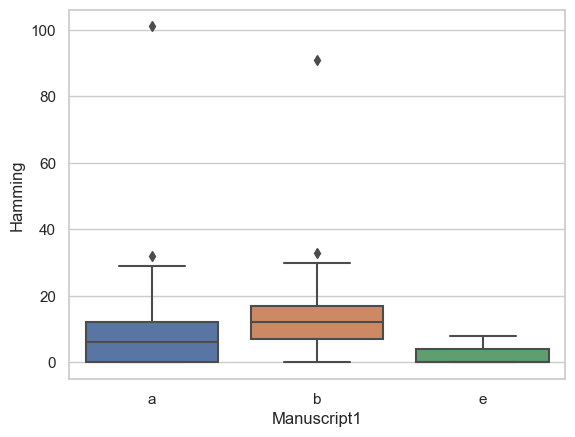

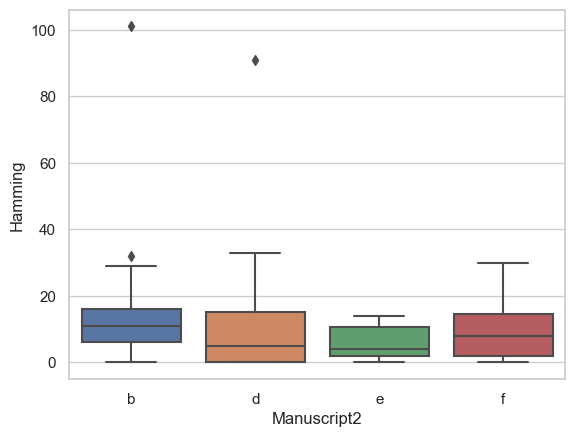

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
ax = sns.boxplot(x="Manuscript1", y="Hamming", data=chap_info_df)
plt.show()
ax = sns.boxplot(x="Manuscript2", y="Hamming", data=chap_info_df)
plt.show()

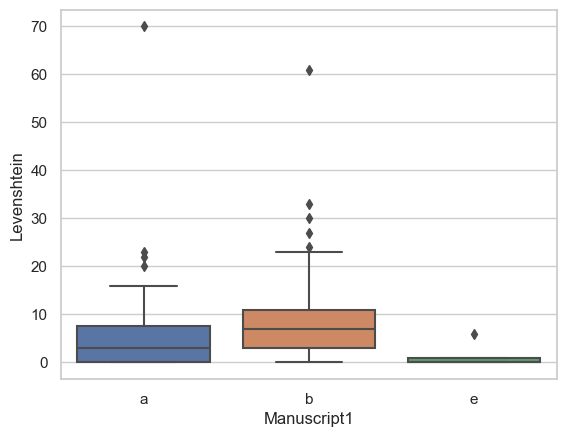

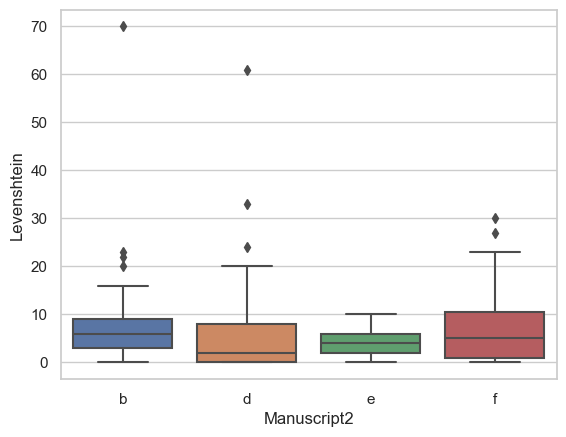

In [19]:
# Create boxplot for levenshtein distances based upon manuscripts
ax = sns.boxplot(x="Manuscript1", y="Levenshtein", data=chap_info_df)
plt.show()
ax = sns.boxplot(x="Manuscript2", y="Levenshtein", data=chap_info_df) 
plt.show()

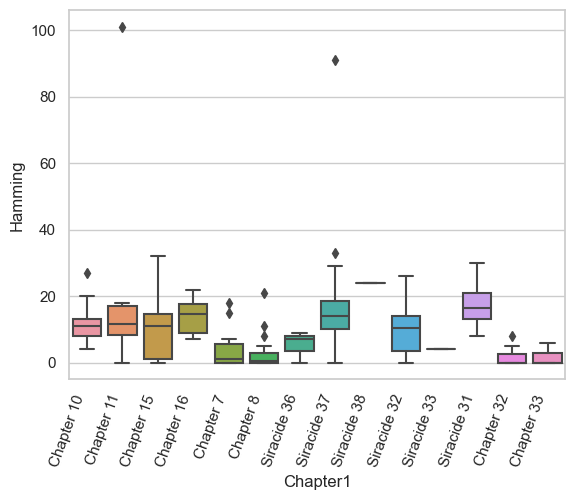

In [25]:
# Create boxplot for levenshtein distances based upon chapter
ax = sns.boxplot(x="Chapter1", y="Hamming", data=chap_info_df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

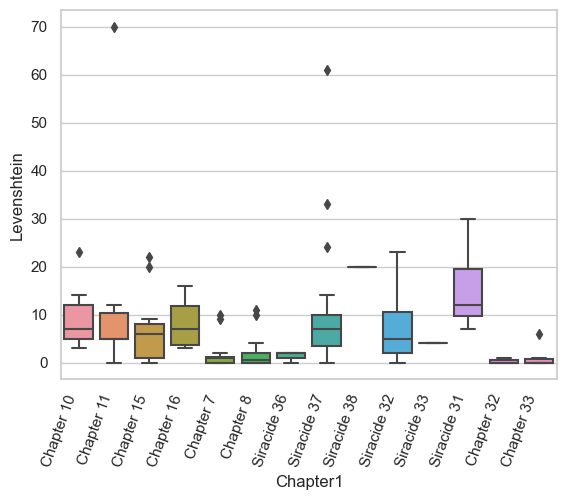

In [29]:
ax = sns.boxplot(x="Chapter1", y="Levenshtein", data=chap_info_df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

## END